In [11]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix 
import warnings                        # To ignore any warnings 

warnings.filterwarnings("ignore")
dataset = pd.read_csv('loan_data_set.csv')


print(dataset['Loan_Status'].value_counts())
dataset.describe()

Y    422
N    192
Name: Loan_Status, dtype: int64


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [22]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


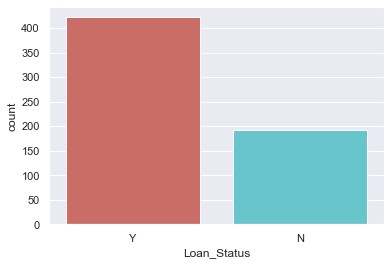

In [21]:
sns.countplot(x = 'Loan_Status', data=dataset, palette='hls')
sns.set(rc={'axes.facecolor':'#f8f9fa', 'figure.facecolor':'#f8f9fa'})
plt.show()

In [2]:
import pandas as pd
dataset = pd.read_csv('loan_data_set.csv')
dataset.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


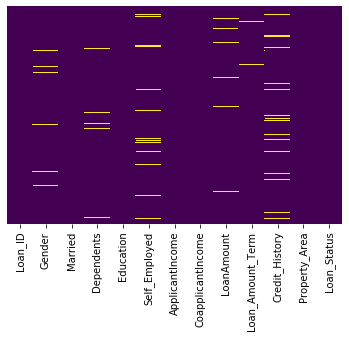

In [12]:
print(dataset.columns[dataset.isnull().any()].tolist())
missing_values = dataset.isnull()
missing_values

sns.heatmap(data = missing_values, yticklabels=False, cbar=False, cmap='viridis') #Heatmap of missing data values

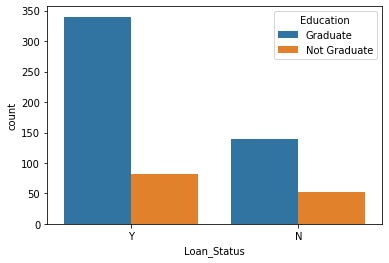

In [13]:

sns.countplot(x='Loan_Status', data=dataset, hue='Education') #comparing those who had the loan and those who didint based their educational background

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier


# encoding the categorical features
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    dataset[i] = le.fit_transform(dataset[i].astype(str))


# spliting the dataset into features and labels
X = pd.DataFrame(dataset.iloc[:, 1:-1]) #excluding Loan_ID
y = pd.DataFrame(dataset.iloc[:,-1]).values.ravel() #just labels


# imputing missing values for the features
imputer = SimpleImputer(strategy="mean")
imputer = imputer.fit(X)
X = imputer.transform(X)

# splitting dataset into train and test dataset
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=7)

Accuracy: 0.8292682926829268
Precision: 0.8118811881188119
Recall: 0.9761904761904762


Text(0.5, 257.44, 'Predicted label')

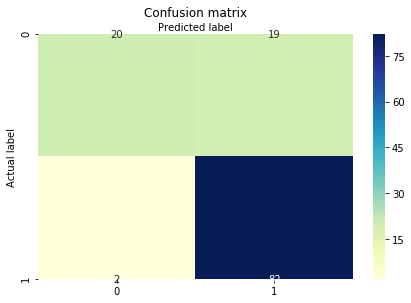

In [5]:
# Logistic Regression 
logistic_reg_model = LogisticRegression(solver='liblinear')
logistic_reg_model.fit(x_train, y_train)
y_pred = logistic_reg_model.predict(x_test)

print("Accuracy:",accuracy_score(y_test, y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))


y_single = logistic_reg_model.predict(x_test[0].reshape(1, -1))


# confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [6]:
model_decision_tree = DecisionTreeClassifier()
model_decision_tree.fit(x_train,y_train)
predictions = model_decision_tree.predict(x_test)
print(accuracy_score(y_test, predictions))




model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))




model = KNeighborsClassifier(n_neighbors=9)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))




model = SVC(gamma='scale', kernel='rbf')
model.fit(x_train,y_train)
predictions = model.predict(x_test)
print(accuracy_score(y_test, predictions))

0.7317073170731707
0.8130081300813008
0.6829268292682927
0.6829268292682927


In [7]:
dataset_test = dataset

features = ['LP001486', 'Male','Yes','1','Not Graduate','No',4583,1508,128,360,1,'Rural','N']

new_customer = pd.DataFrame({
     'Loan_ID': [features[0]],
     'Gender': [features[1]],
     'Married': [features[2]],
     'Dependents': [features[3]],
     'Education': [features[4]],
     'Self_Employed': [features[5]]
     'ApplicantIncome': [features[6]],
     'CoapplicantIncome': [features[7]],
     'LoanAmount': [features[8]],
     'Loan_Amount_Term': [features[9]],
     'Credit_History': [features[10]],
     'Property_Area':[features[11]],
     'Loan_Status': [features[12]],
})


# append new single input to end of dataset
dataset_test = dataset_test.append(new_customer)


# encoding the categorical features
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    dataset_test[i] = le.fit_transform(dataset_test[i].astype(str))

    
# extrating encoded user input from encoded dataset    
user = dataset_test[-1:] # last row contains user data
user = pd.DataFrame(user.iloc[:, 1:-1]) # exclude ID
user.values

y_single = model_decision_tree.predict(user.values) # Test encoded input on decision tress model
print(y_single[0])

SyntaxError: invalid syntax (<ipython-input-7-d8f04432b0c4>, line 12)

In [ ]:
import pandas as pd
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier


dataset_1 = pd.read_csv('loan_data_set.csv')
dataset_1 = dataset_1.drop('Loan_ID', axis=1)


X = dataset_1.drop('Loan_Status', axis=1)
y = dataset_1['Loan_Status']


x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=7)


# numeric_features = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
numeric_features = dataset_1.select_dtypes(include=['int64', 'float64']).columns
numeric_features_steps = [('imputer', SimpleImputer(strategy='median')),('scaler', MinMaxScaler())]
numeric_transformer = Pipeline(steps=numeric_features_steps)



# categorical_features = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
categorical_features = dataset_1.select_dtypes(include=['object']).drop(['Loan_Status'], axis=1).columns
categorical_features_steps = [('imputer', SimpleImputer(strategy='constant', fill_value='missing')),('onehot', OneHotEncoder())]
categorical_transformer = Pipeline(steps=categorical_features_steps)



preprocessor = ColumnTransformer(
    remainder = 'passthrough',
    transformers=[
    ('numeric', numeric_transformer, numeric_features),
    ('categorical', categorical_transformer, categorical_features)
])

classifiers = {
    'K-Nearnest Neighbour': KNeighborsClassifier(9),
    'Logistic Regression(solver=liblinear)': LogisticRegression(solver='liblinear'),
    'Support Vector Machine(gamma=auto, kernel=rbf)': SVC(gamma='auto', kernel='rbf'),
    'Support Vector Machine(kernel="rbf", C=0.025, probability=True)': SVC(gamma='auto', kernel="rbf", C=0.025, 
                                                                           probability=True),
    'Nu Support Vector Machine(probability=True)': NuSVC(gamma='auto', probability=True),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=100),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier()
}


pred_models = []

for name, classifier in classifiers.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', classifier)])
    
    pipe.fit(x_train, y_train)
    pred_models.append(pipe)
    
y_pred = pred_models[1].predict(x_test)
# print("Accuracy: %.4f" % pred_models[1].score(x_test, y_test))

x_test


# for name, classifier in classifiers.items():
#     pipe = Pipeline(steps=[('preprocessor', preprocessor),('classifier', classifier)])
#     pipe.fit(x_train, y_train)
#     y_pred = pipe.predict(x_test)
#     print("Classifier: ", name)
#     print("Accuracy: %.4f" % pipe.score(x_test, y_test))

In [ ]:
features = ['LP001486', 'Male', 'Yes', '1', 'Graduate', 'No', 5483, 1508, 128, 360, 0, 'Urban', 'N']

new_customer = pd.DataFrame({
     'Gender': [features[1]],
     'Married': [features[2]],
     'Dependents': [features[3]],
     'Education': [features[4]],
     'Self_Employed': [features[5]],
     'ApplicantIncome': [features[6]],
     'CoapplicantIncome': [features[7]],
     'LoanAmount': [features[8]],
     'Loan_Amount_Term': [features[9]],
     'Credit_History': [features[10]],
     'Property_Area':[features[11]],
})


y_pred_single = pred_models[1].predict(new_customer)
# print(y_pred_single[0])

if y_pred_single[0] == 'Y':
    print('Yes, you\'re eligible')
else:
    print('Sorry, you\'re not eligible')
        